# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [63]:
# Dependencies and Setup
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [64]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 628


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [65]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")


# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    units = "metric"
    city_url = f"{url}q={city}&appid={weather_api_key}&units={units}"

    response = requests.get(city_url)
    response

    response_json = response.json()
   
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = response_json['weather']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response_json['coord']['lat']
        city_lng = response_json['coord']['lon']
        city_max_temp = response_json['main']['temp_max']
        city_humidity = response_json['main']['humidity']
        city_clouds = response_json['clouds']['all']
        city_wind = response_json['wind']['speed']
        city_country = response_json['sys']['country']
        city_date = response_json['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | wailua homesteads
Processing Record 2 of Set 1 | puerto francisco de orellana
Processing Record 3 of Set 1 | amahai
Processing Record 4 of Set 1 | khodzha-maston
Processing Record 5 of Set 1 | kili
Processing Record 6 of Set 1 | georgetown
Processing Record 7 of Set 1 | ancud
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | st. john's
Processing Record 10 of Set 1 | alo
Processing Record 11 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 12 of Set 1 | la foa
Processing Record 13 of Set 1 | taiohae
City not found. Skipping...
Processing Record 14 of Set 1 | udachny
Processing Record 15 of Set 1 | manturovo
Processing Record 16 of Set 1 | kerikeri
Processing Record 17 of Set 1 | kertih
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | knokke-heist
Processing Record 21 of Set 1 | ma

In [66]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          600
Lat           600
Lng           600
Max Temp      600
Humidity      600
Cloudiness    600
Wind Speed    600
Country       600
Date          600
dtype: int64

In [67]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,wailua homesteads,22.0669,-159.3780,23.24,89,100,0.89,US,1712887036
1,puerto francisco de orellana,-0.4667,-76.9667,24.78,91,98,1.10,EC,1712887150
2,amahai,-3.3333,128.9167,28.44,75,36,0.67,ID,1712886643
3,khodzha-maston,38.7446,68.6270,10.68,79,100,2.59,TJ,1712887152
4,kili,5.6439,169.1211,27.27,85,100,7.53,MH,1712887153


In [68]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [69]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wailua homesteads,22.0669,-159.3780,23.24,89,100,0.89,US,1712887036
1,puerto francisco de orellana,-0.4667,-76.9667,24.78,91,98,1.10,EC,1712887150
2,amahai,-3.3333,128.9167,28.44,75,36,0.67,ID,1712886643
3,khodzha-maston,38.7446,68.6270,10.68,79,100,2.59,TJ,1712887152
4,kili,5.6439,169.1211,27.27,85,100,7.53,MH,1712887153


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

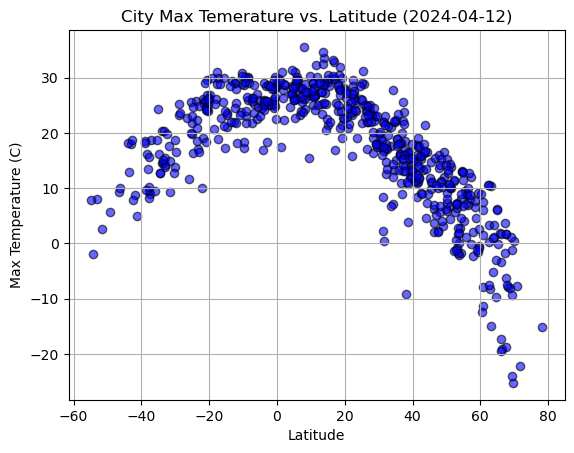

In [70]:
# Build scatter plot for latitude vs. temperature
import time
from datetime import datetime

max_temperature = city_data_df['Max Temp']
latitude = city_data_df['Lat']
date_time = datetime.utcfromtimestamp(city_data_df['Date'][1])

plt.scatter(latitude, max_temperature, color='blue', edgecolors='black', alpha = .6)


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Temerature vs. Latitude (' + time.strftime(str(date_time.date())) + ')')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

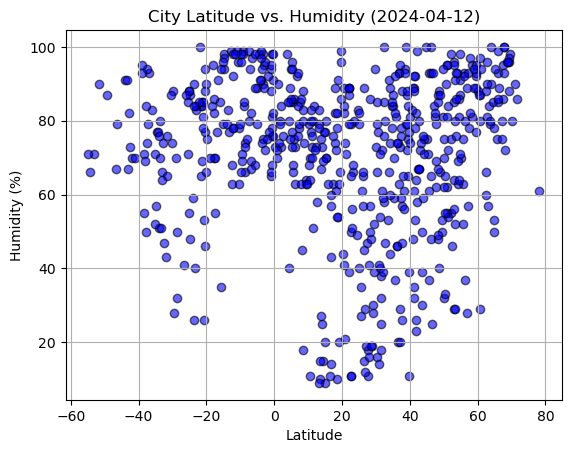

In [71]:
# Build the scatter plots for latitude vs. humidity
humidity = city_data_df['Humidity']
plt.scatter(latitude, humidity, color='blue', edgecolors='black', alpha = .6)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (' + time.strftime(str(date_time.date())) + ')')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

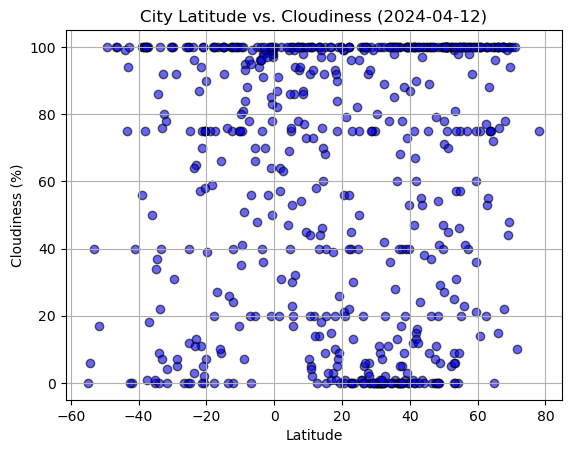

In [72]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness = city_data_df['Cloudiness']
plt.scatter(latitude, cloudiness, color='blue', edgecolors='black', alpha = .6)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (' + time.strftime(str(date_time.date())) + ')')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

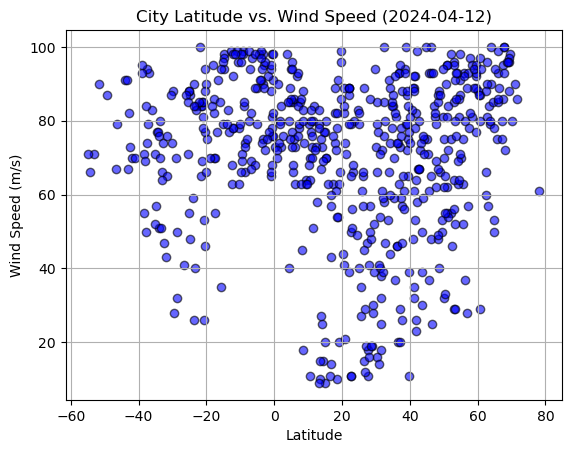

In [73]:
# Build the scatter plots for latitude vs. wind speed
Wind_speed = city_data_df['Wind Speed']
plt.scatter(latitude, humidity, color='blue', edgecolors='black', alpha = .6)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed (' + time.strftime(str(date_time.date())) + ')')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [75]:
# Define a function to create Linear Regression plots
def linear_regession_plots(x, y, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regression_line = slope * x + intercept
    line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x, y, color='blue', label='Data Points', alpha = .6)
    plt.plot(x, regression_line, "r-", color='red', label='Regression Line')
    plt.annotate(line_equation, text_coordinates, fontsize=15, color="red")
    
   
    print(f'\nThe r-squared is: {(rvalue ** 2)}')
    
    plt.show()

In [76]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wailua homesteads,22.0669,-159.3780,23.24,89,100,0.89,US,1712887036
3,khodzha-maston,38.7446,68.6270,10.68,79,100,2.59,TJ,1712887152
4,kili,5.6439,169.1211,27.27,85,100,7.53,MH,1712887153
5,georgetown,5.4112,100.3354,30.96,66,20,3.60,MY,1712886933
8,st. john's,47.5649,-52.7093,2.21,81,0,7.20,CA,1712886691


In [77]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,puerto francisco de orellana,-0.4667,-76.9667,24.78,91,98,1.10,EC,1712887150
2,amahai,-3.3333,128.9167,28.44,75,36,0.67,ID,1712886643
6,ancud,-41.8697,-73.8203,8.67,70,0,2.74,CL,1712887100
7,adamstown,-25.0660,-130.1015,21.74,55,12,5.83,PN,1712887020
10,la foa,-21.7108,165.8276,26.16,65,94,3.68,NC,1712887161


###  Temperature vs. Latitude Linear Regression Plot


The r-squared is: 0.7688334102043406


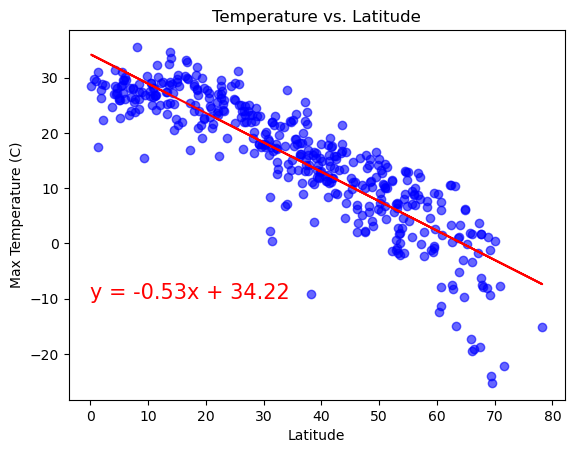

In [78]:
# Linear regression on Northern Hemisphere
lat_north = northern_hemi_df['Lat']
max_temp_north = northern_hemi_df['Max Temp']
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Temperature vs. Latitude')

linear_regession_plots(lat_north, max_temp_north, 'Temperature vs Latitude', (0,-10))




The r-squared is: 0.5962085828843661


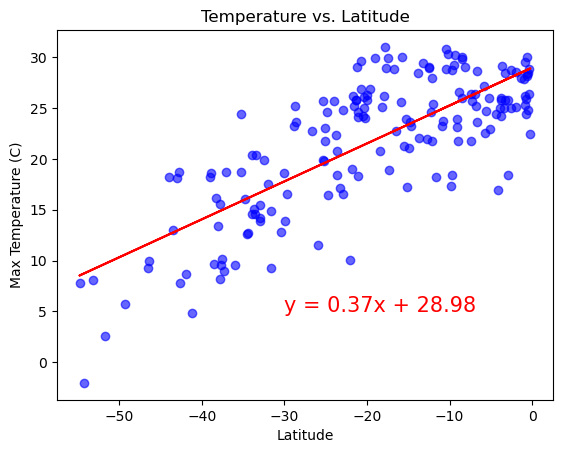

In [79]:
# Linear regression on Southern Hemisphere
lat_south = southern_hemi_df['Lat']
max_temp_south = southern_hemi_df['Max Temp']
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Temperature vs. Latitude')

linear_regession_plots(lat_south, max_temp_south, 'Temperature vs Latitude', (-30,5))

**Discussion about the linear relationship:** The above two graphs show that the closer you are to the equator, the higher the temperatures.

### Humidity vs. Latitude Linear Regression Plot


The r-squared is: 0.04162763695481104


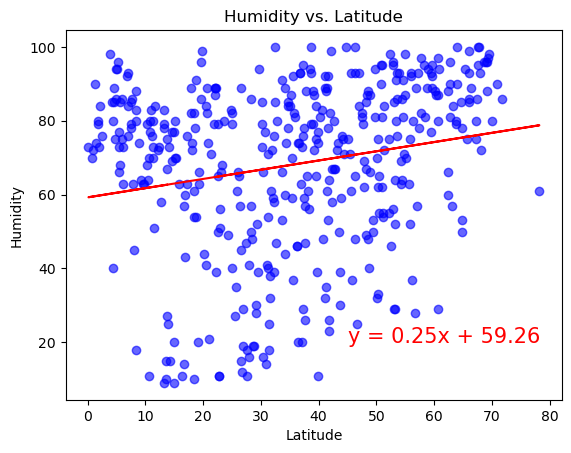

In [80]:
# Northern Hemisphere
lat_north = northern_hemi_df['Lat']
humidity_north = northern_hemi_df['Humidity']
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Humidity vs. Latitude')

linear_regession_plots(lat_north, humidity_north, 'Humidity vs Latitude', (45, 20))


The r-squared is: 0.08926991201572129


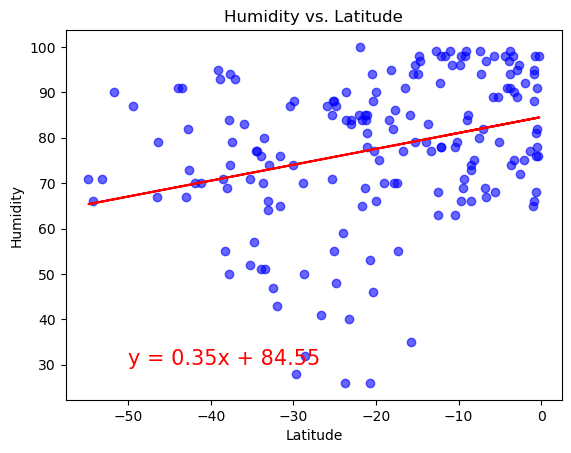

In [81]:
# Southern Hemisphere
lat_south = southern_hemi_df['Lat']
humidity_south = southern_hemi_df['Humidity']
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Humidity vs. Latitude')

linear_regession_plots(lat_south, humidity_south, 'Humidity vs Latitude', (-50, 30))

**Discussion about the linear relationship:** The latitude of a city has a low correlation with the humitity.

### Cloudiness vs. Latitude Linear Regression Plot


The r-squared is: 0.011895591304707525


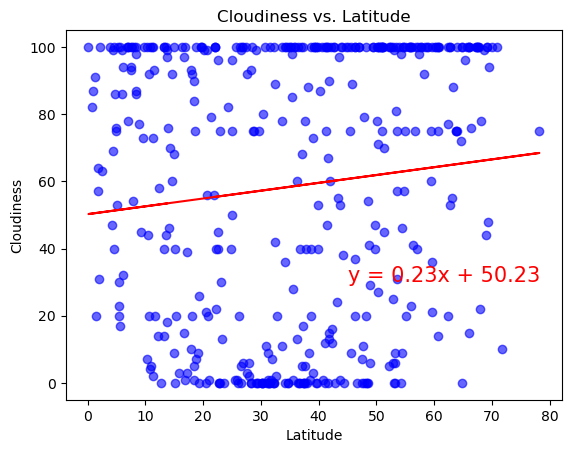

In [83]:
# Northern Hemisphere
lat_north = northern_hemi_df['Lat']
cloudiness_north = northern_hemi_df['Cloudiness']
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Cloudiness vs. Latitude')

linear_regession_plots(lat_north, cloudiness_north, 'Cloudiness vs Latitude', (45, 30))


The r-squared is: 0.05660372657516913


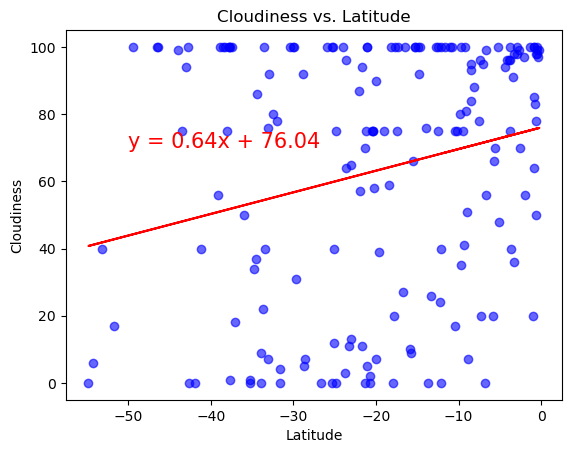

In [84]:
# Southern Hemisphere
lat_south = southern_hemi_df['Lat']
cloudiness_south = southern_hemi_df['Cloudiness']
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Cloudiness vs. Latitude')

linear_regession_plots(lat_south, cloudiness_south, 'Cloudiness vs Latitude', (-50, 70))

**Discussion about the linear relationship:** The latitude of a city has a low correlation with the cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot


The r-squared is: 0.014440655471259082


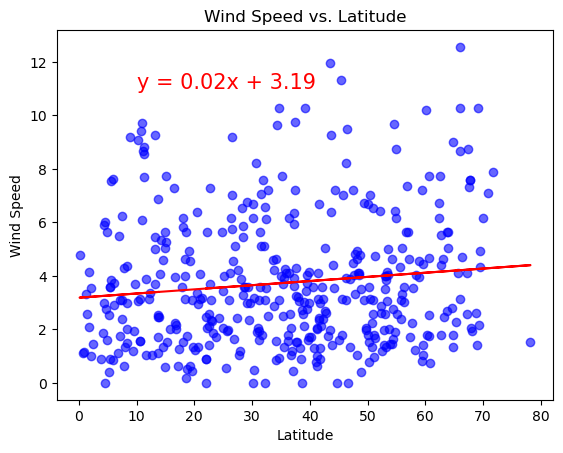

In [85]:
# Northern Hemisphere
lat_north = northern_hemi_df['Lat']
wind_north = northern_hemi_df['Wind Speed']
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Wind Speed vs. Latitude')

linear_regession_plots(lat_north, wind_north, 'Wind Speed vs Latitude', (10, 11))


The r-squared is: 0.13910149922086457


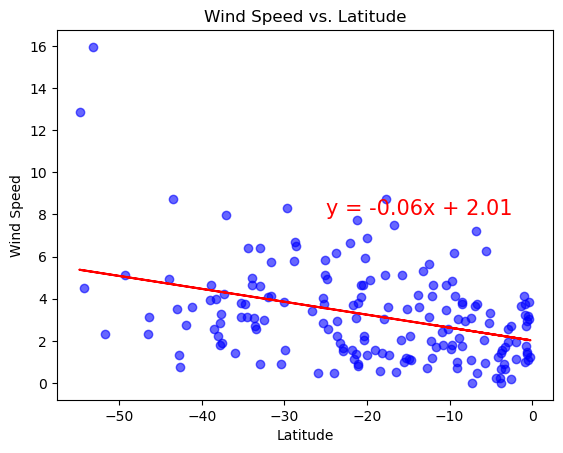

In [86]:
# Southern Hemisphere
lat_south = southern_hemi_df['Lat']
wind_south = southern_hemi_df['Wind Speed']
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Wind Speed vs. Latitude')

linear_regession_plots(lat_south, wind_south, 'Wind Speed vs Latitude', (-25, 8))

**Discussion about the linear relationship:** The latitude of a city has a low correlation with the wind speed.  However, in the southern hemisphere, the wind appears to trend towards lower speed as you move closer to the equator.